In [4]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import imutils
%matplotlib inline

In [2]:
video_capture = cv2.VideoCapture(0)
# Check success
if not video_capture.isOpened():
    raise Exception("Could not open video device")
# Read picture. ret === True on success
ret, frame = video_capture.read()
# Close device
video_capture.release()

In [2]:
from matplotlib import pyplot as plt
frameRGB = frame[:,:,::-1] # BGR => RGB
plt.imshow(frameRGB)
cv2.imwrite('outline.jpg', frameRGB)

NameError: name 'frame' is not defined

True

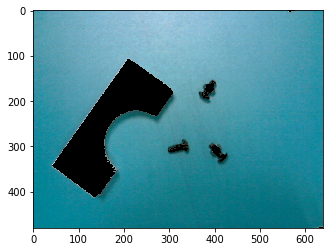

In [5]:
 frame = cv2.imread("scanfoto.jpg")
hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
#lower_blue = np.array([13,150,38])
#lower_blue =np.array([10,20,38]) tussenstuk
lower_blue = np.array([10,40,38])

upper_blue = np.array([100,255,255])

mask =cv2.inRange(hsv, lower_blue, upper_blue)
res =cv2.bitwise_and(frame, frame,mask=mask)
plt.imshow(res)
cv2.imwrite('foto-kleur.png', res)

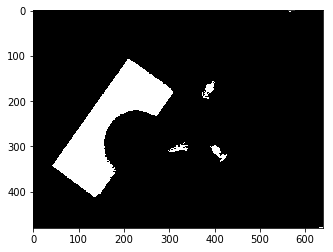

In [6]:
foto_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
foto_preprocessed = cv2.GaussianBlur(foto_gray, (5, 5), 0)
_, foto_binary = cv2.threshold(foto_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get foto
foto_binary = cv2.bitwise_not(mask)
plt.imshow(cv2.cvtColor(foto_binary, cv2.COLOR_GRAY2RGB))
cv2.imwrite('foto-binary.png', mask)

rest =cv2.bitwise_and(foto_binary, foto_binary,mask=mask)

#fotozwat = foto_binary[:,::-1] # BGR => RGB

True

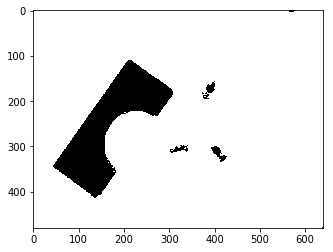

In [7]:
#noise remove
morph_kernel = np.ones((2,2),np.uint8)
coins_morph = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))
cv2.imwrite('foto-zwawit.png', coins_morph)

In [8]:
# Converting the image to grayscale.
#gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Using the Canny filter to get contours
edges = cv2.Canny(coins_morph, 20, 30)
# Using the Canny filter with different parameters
edges_high_thresh = cv2.Canny(coins_morph, 60, 120)
# Stacking the images to print them together
# For comparison
images = np.hstack((coins_morph, edges, edges_high_thresh))



True

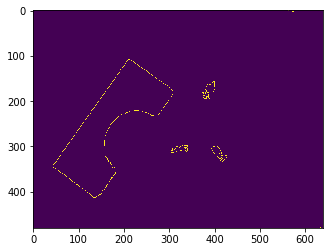

In [9]:
# Display the resulting frame
plt.imshow(edges)
plt.imshow(edges_high_thresh)
#cv2.imshow('frame', edges)
cv2.imwrite('outlineGcode.png', edges_high_thresh)

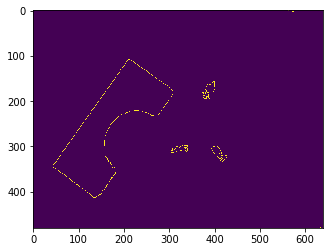

In [10]:
plt.imshow(edges)

AttributeError: 'numpy.ndarray' object has no attribute 'mode'